# Tensorflow Basics
I will try to simplify the operations around using tensorflow . I am creating this for my own understanding. Feel free to use this . It will be a code level introduction . I won't go into the inner working of Tensorflow. The idea is to create a resource starting from how you define variables in tensorflow to using it to build a multi layered neural net.

This notebook is running on tf version 1.8.0

## Defining Variables , Creating Sessions

In [1]:
#printing Hello World
import tensorflow as tf

a = tf.constant('Hello World')

sess = tf.Session()

sess.run(a)

b'Hello World'

In [2]:
#Basic Operations with constants as graph inputs

a = tf.constant(3)
b = tf.constant(2)

with tf.Session() as sess:
    print(sess.run(a+b))

5


In [3]:
#Basic Operations with variables as graph inputs

#Defining placeholders for the variables
a = tf.placeholder(tf.int16) 
b = tf.placeholder(tf.int16)

add = tf.add(a , b)
with tf.Session() as sess:
    print(sess.run(add , feed_dict={a:2 , b : 3})) #Defining the variable at runtime by passing feed dict

5


## Eager API

Tensorflow takes care of the problem of sessions and graphs by giving the eager API . Once you enable it , it tells tf to work like how we work in Python. That means , printing variables as we go and not worry about adding nodes to graph etc.


Eager execution should be invoked at the start of the program without any running session and then we can enable eager execution 
Restart the kernel and import tensorflow 

In [1]:
import tensorflow as tf

tf.enable_eager_execution() #Enabling the eager mode

In [2]:
tf.executing_eagerly() #Checking if tf is going to execute eagerly

True

In [3]:
a = tf.constant(3)
b = tf.constant(2)

c = a+b

In [4]:
print(c) # Wow , we didn't need to create a new session or anything. Yayy.

tf.Tensor(5, shape=(), dtype=int32)


Now that we know how to define variables and how to use sessions for running operations , let's jump right into Machine Learning . Let's start with a simple linear regression. 


Note : We are not concerned about the performance of the model , we will just see how we can use tensorflow to build a logistic model . So we will just give the model a pretty easy function to learn .

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = numpy.random

In [8]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

Let's create the training data.
As told above , let's give the model to learn a easy function $y = x + 1$

In [10]:
train_X = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
train_Y = np.array([2,3,4,5,6,7,8,9,10,11,12,13])
n_samples = train_X.shape[0]

In [11]:
#Creating placeholders for X and y
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [12]:
#Defining the operation
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
#Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.010818630 W= 0.9646841 b= 1.3118615
Epoch: 0100 cost= 0.008692600 W= 0.9683437 b= 1.2795445
Epoch: 0150 cost= 0.006984351 W= 0.9716243 b= 1.2505754
Epoch: 0200 cost= 0.005611829 W= 0.9745646 b= 1.2246095
Epoch: 0250 cost= 0.004509042 W= 0.9772004 b= 1.2013344
Epoch: 0300 cost= 0.003622931 W= 0.9795632 b= 1.1804703
Epoch: 0350 cost= 0.002910977 W= 0.981681 b= 1.1617688
Epoch: 0400 cost= 0.002338938 W= 0.9835792 b= 1.1450057
Epoch: 0450 cost= 0.001879295 W= 0.9852809 b= 1.129979
Epoch: 0500 cost= 0.001509967 W= 0.9868063 b= 1.1165088
Epoch: 0550 cost= 0.001213223 W= 0.9881735 b= 1.1044352
Epoch: 0600 cost= 0.000974811 W= 0.98939914 b= 1.0936127
Epoch: 0650 cost= 0.000783243 W= 0.9904975 b= 1.083912
Epoch: 0700 cost= 0.000629313 W= 0.9914824 b= 1.0752157
Epoch: 0750 cost= 0.000505657 W= 0.99236494 b= 1.0674223
Epoch: 0800 cost= 0.000406284 W= 0.99315614 b= 1.0604353
Epoch: 0850 cost= 0.000326445 W= 0.9938654 b= 1.0541728
Epoch: 0900 cost= 0.000262286 W= 0.99450123 b= 1

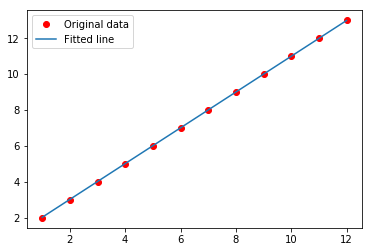

In [15]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Great , looks like the model learnt the function pretty well .
And with that we have trained our first model in tensorflow . Yayy .

Next we will see how to save a model and restore it to make a prediction

# Saving Models , Restoring Models 